 # <a>**Selection methods**</a>

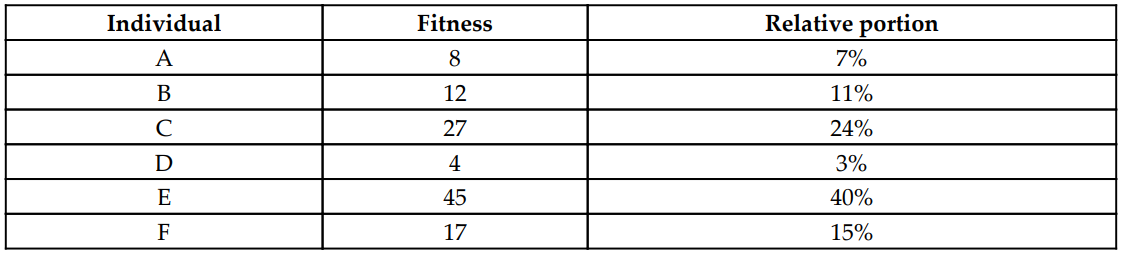

In [ ]:
#Relative portion
sum=(8+12+27+4+45+17)
for i in [8,12,27,4,45,17]:
  print(100*(i/sum))

7.079646017699115
10.619469026548673
23.893805309734514
3.5398230088495577
39.823008849557525
15.04424778761062


#Roulette wheel selection

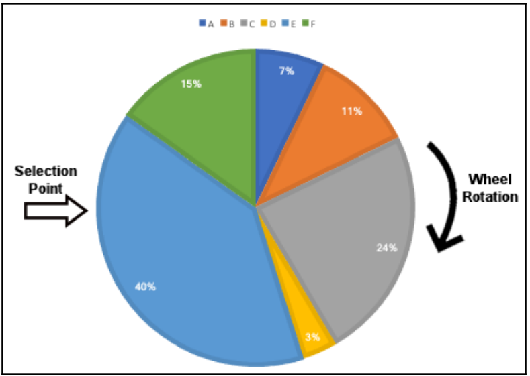

#Stochastic universal sampling

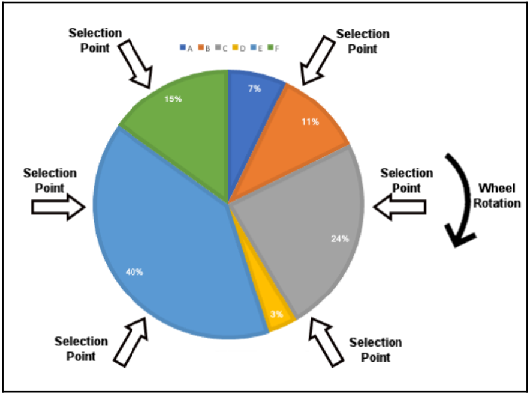

#Rank-based selection

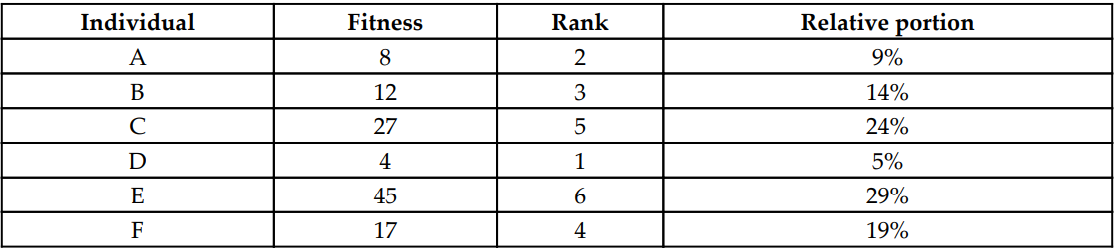

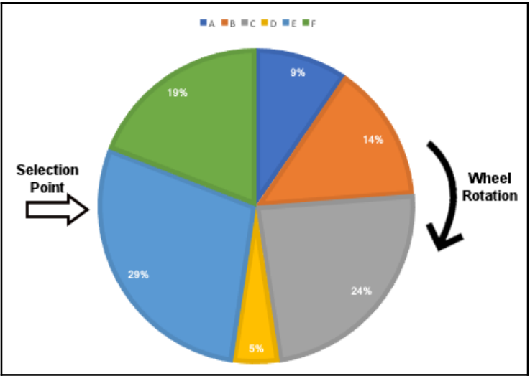

#Fitness scaling

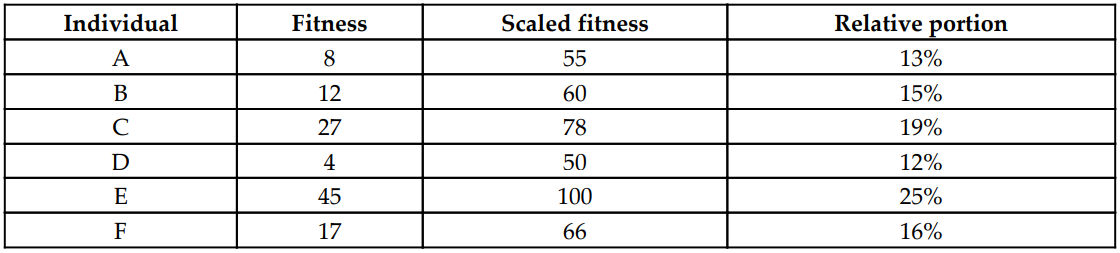

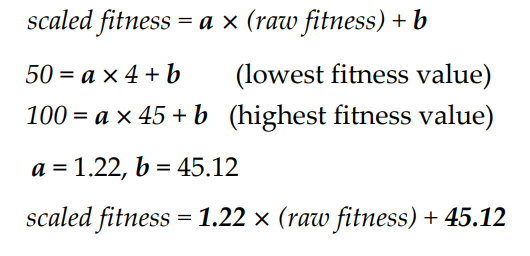

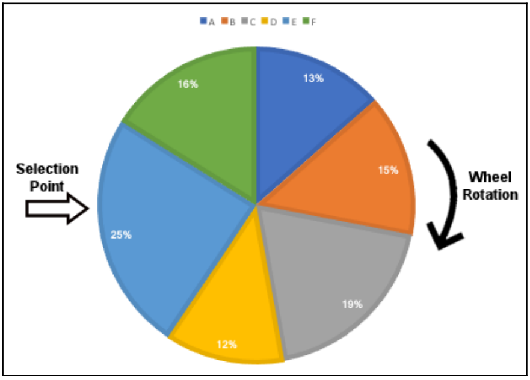

#Tournament selection

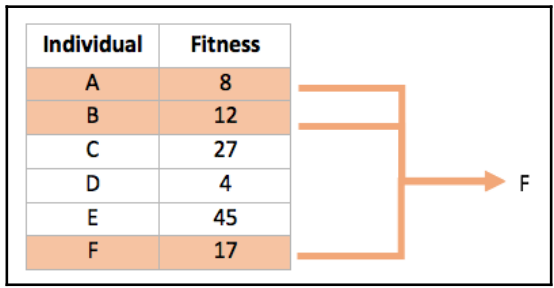

#<a>**Crossover methods**</a>

#Single-point crossover

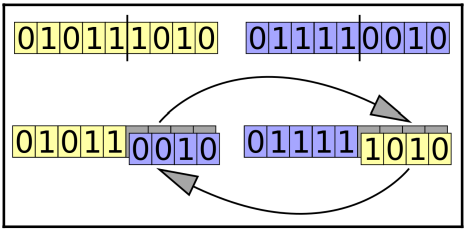

#Two-point and k-point crossover

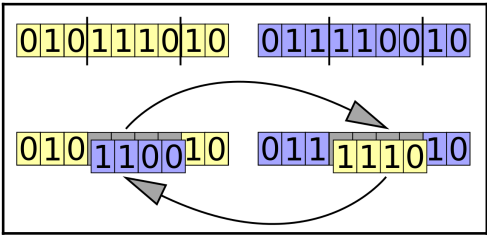

#Uniform crossover

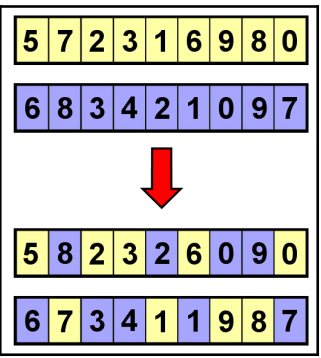

#each parent has the same chance of influencing the offspring

#Ordered crossover

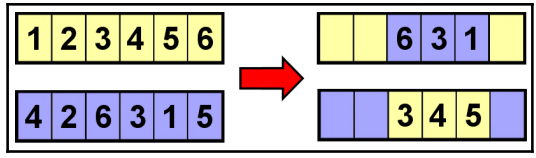

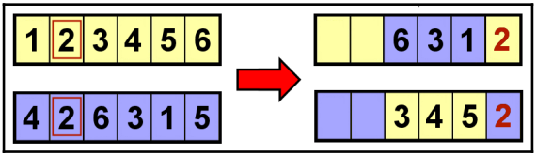

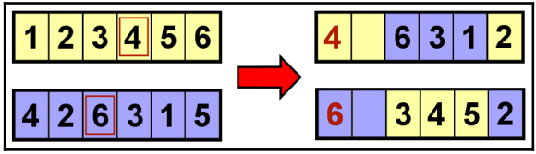

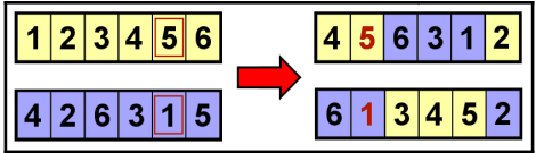

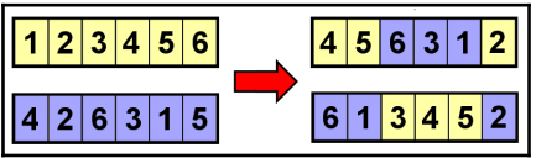

# <a>**Mutation methods**<a/>

#Flip bit mutation

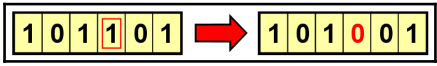

#Swap mutation


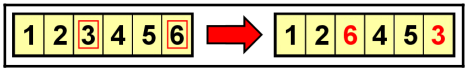

#Inversion mutation

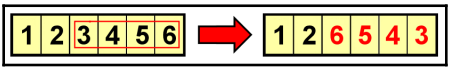

#Scramble mutation

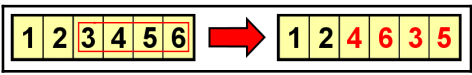

#<a>**Real-coded genetic algorithms**</a>

#**Crossover**

#**Arithmetic crossover**

#**Child1= a.P1gene + (1-a).P2gene**
 
#**Child2= a.P2gene+ (1-a).P1gene**
 
##**-g <= a <= 1+g**

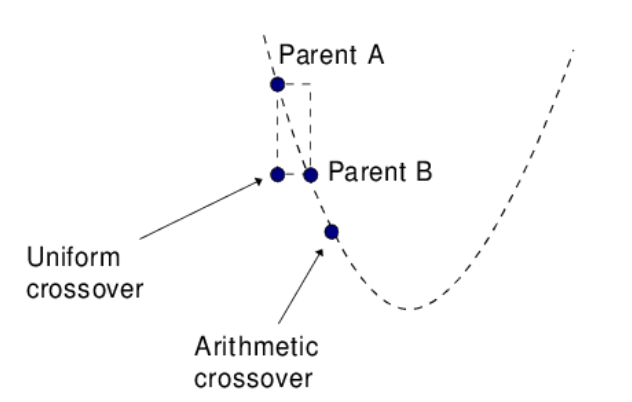

#Blend crossover

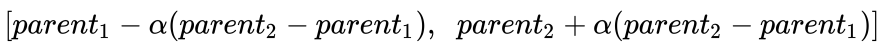

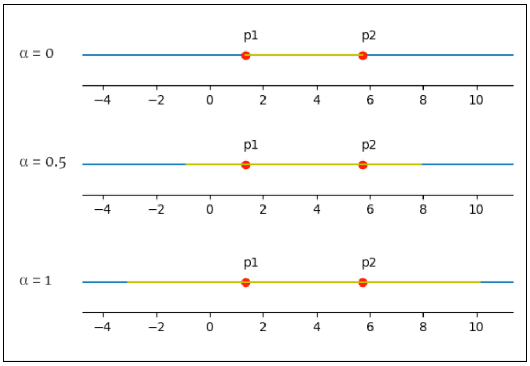

#Simulated binary crossover

[Paper](https://www.semanticscholar.org/paper/Simulated-Binary-Crossover-for-Continuous-Search-Deb-Agrawal/b8ee6b68520ae0291075cb1408046a7dff9dd9ad)

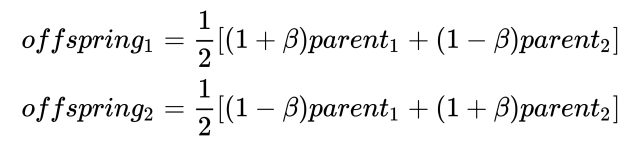

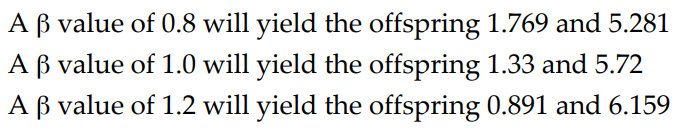

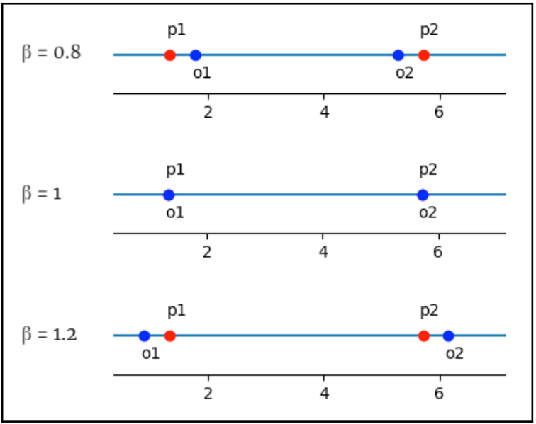

#<a>**solve a simple problem using a Genetic algorithm**

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#chromosome
class chromosome:
    def __init__(self,posotion,cost_func):
        self.posotion=posotion
        self.cost=0
        self.evalfn=cost_func
        self.evaluate()

    def evaluate(self):
        self.cost=self.evalfn(self.posotion)

In [3]:
#Crossover

def singlepointcrossover(p1,p2):
    nvar=len(p1)
    valid_section=np.random.randint(nvar-1)
    c1= list(p1[:valid_section]) +  list(p2[valid_section+1:])
    c2= list(p2[:valid_section]) + list( p1[valid_section+1:])
    return c1,c2

In [4]:
#fitness || cost function
def minone(x):
    return sum(x)

In [5]:
#Mutation
def mutation(p):
    i = np.random.randint(len(p))
    p[i]=1-p[i]
    return p

iteration  0  best cost :  18.0
iteration  1  best cost :  18.0
iteration  2  best cost :  18.0
iteration  3  best cost :  18.0
iteration  4  best cost :  18.0
iteration  5  best cost :  18.0
iteration  6  best cost :  18.0
iteration  7  best cost :  17.0
iteration  8  best cost :  17.0
iteration  9  best cost :  16.0
iteration  10  best cost :  16.0
iteration  11  best cost :  14.0
iteration  12  best cost :  14.0
iteration  13  best cost :  14.0
iteration  14  best cost :  14.0
iteration  15  best cost :  14.0
iteration  16  best cost :  13.0
iteration  17  best cost :  12.0
iteration  18  best cost :  12.0
iteration  19  best cost :  12.0
iteration  20  best cost :  11.0
iteration  21  best cost :  10.0
iteration  22  best cost :  10.0
iteration  23  best cost :  10.0
iteration  24  best cost :  10.0
iteration  25  best cost :  9.0
iteration  26  best cost :  9.0
iteration  27  best cost :  8.0
iteration  28  best cost :  8.0
iteration  29  best cost :  8.0
iteration  30  best cost 

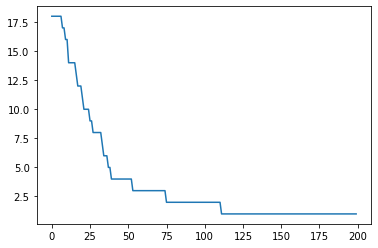

In [7]:
# variables defenation
variable_num = 50

iteration_max=200

population_num=20

cross_over_percentage=0.8

cross_over_num= 2 *  math.floor(population_num /2)

mutaion_percentage=0.3

mutation_num=math.floor(mutaion_percentage* population_num)

#population => create , initial , evaluate

population= [chromosome(np.random.randint(low=0,high=2,size=variable_num),minone) 
                        for i in range(population_num)]

population=sorted(population, key=lambda x: x.cost)

best_solution = population[0]

best_cost = np.zeros(iteration_max)

for it_index in range(iteration_max):

    #crossover
    rows , cols =(int(cross_over_num/2) , 2)

    # pop _=[ 10 , 10 ] (10,2)
    #main population 
    #popc =>temp
    popc= [[chromosome(np.random.randint(low=0,high=2,size=variable_num),minone)] * cols ] * rows

    for k in range(int(cross_over_num/2)):
        i1=np.random.randint(population_num)
        p1=population[i1]
        i2 = np.random.randint(population_num)
        p2 = population[i2]
        popc[k][0].posotion , popc[k][1].posotion  = singlepointcrossover(p1.posotion,p2.posotion)
        popc[k][0].evaluate()
        popc[k][1].evaluate()


    #mutation
    popm=[chromosome(np.random.randint(2,size=variable_num),minone) for i in range(mutation_num)]
    for k in range(mutation_num):
        i= np.random.randint(mutation_num)
        pm=popm[i]
        popm[k].posotion = mutation(pm.posotion)
        popm[k].evaluate()


    pop = list(population) + list(np.asarray(popc).flatten(order='C')) + list(popm)
    pop=sorted(pop, key=lambda x: x.cost)
    population = pop[:population_num]

    best_solution = population[0]
    best_cost[it_index]=best_solution.cost

    print('iteration ' , it_index , ' best cost : ' ,best_cost[it_index])

plt.plot([i for i in range(len(best_cost))] ,best_cost)
plt.show()



#<a>**Introduction of Deap Framework**</a>

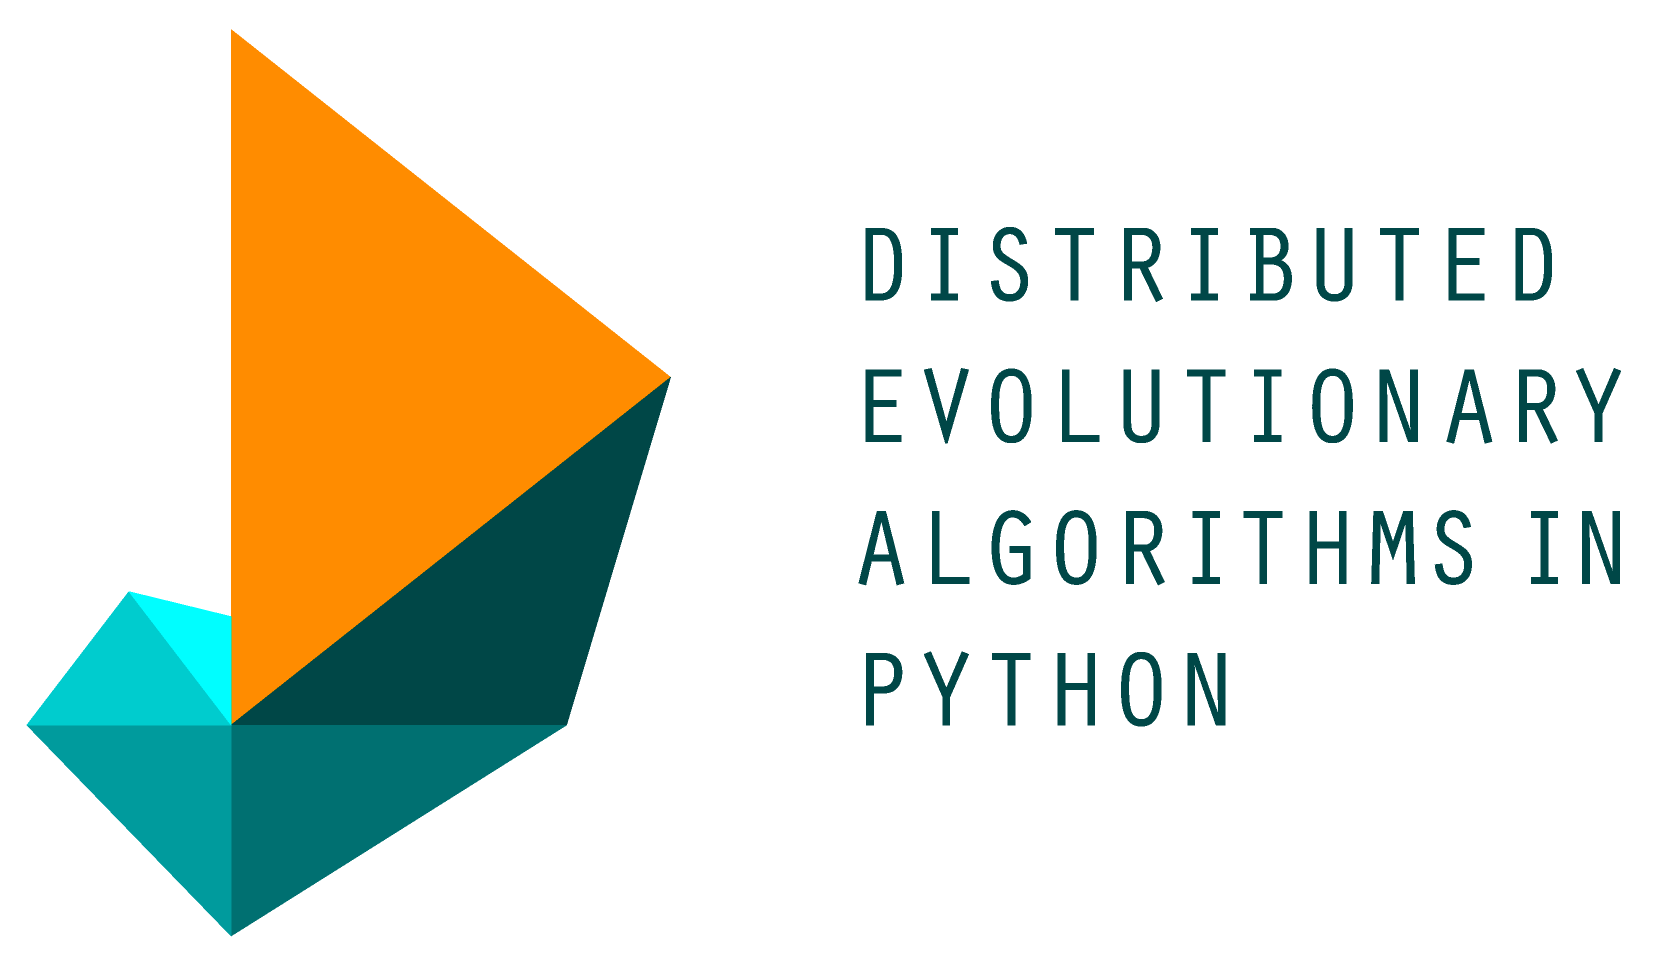
[DEAP Framework](https://deap.readthedocs.io/en/master/index.html)

In [17]:
pip install deap

In [18]:
from deap import creator
from deap import base

#creator

In [19]:
class Employee:
  def __init__():
    pass

creator.create("Developer", Employee, position = "Developer", programmingLanguages = set)


In [ ]:
class Developer(Employee):
  position = "Developer"

  def __init__(self):
    self.programmingLanguages = set()

In [20]:

creator.create("FitnessMin", base.Fitness , weights=(-1.0,))

In [21]:
creator.create("Individual", list, fitness=creator.FitnessMin)

#toolbox

In [22]:
def sumOfTwo(a, b):
 return a + b

In [23]:
toolbox= base.Toolbox()
toolbox.register("incrementByFive", sumOfTwo, b=5)

In [24]:
toolbox.incrementByFive(10)

15

In [ ]:
sumOfTwo(10, 5)

15

#tools module

In [25]:
from deap import tools
#selection

#selTournament()
#selStochasticUniversalSampling()
#selRoulette() 
toolbox.register("select", tools.selTournament, tournsize=3)

#cxOrdered() i
#cxUniform()
#cxOnePoint() 
#two-point crossover.
toolbox.register("mate", tools.cxTwoPoint)

#mutGaussian()
#mutaion //with 0.02 as the probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=0.02)


In [13]:
import random
randomList = tools.initRepeat(list, random.random, 30)
randomList

[0.7122428805853763,
 0.3026576666803238,
 0.4082083204733714,
 0.8941415449066665,
 0.486636442567433,
 0.12289507216078299,
 0.5509982615063678,
 0.559071785571734,
 0.7802993084534016,
 0.5758351235854829,
 0.27569215334827446,
 0.26203174446239863,
 0.8154555339360825,
 0.7904203432916,
 0.4388424536446909,
 0.6289406332394426,
 0.2960969887055447,
 0.14431829524338857,
 0.13230397019841444,
 0.4958772063722836,
 0.1338459585234716,
 0.385189576499523,
 0.18073269827452043,
 0.48284591797902887,
 0.6780029581387488,
 0.38833782630143054,
 0.31209161281987796,
 0.37822164032880445,
 0.549923483877619,
 0.16241474375312215]

In [26]:
def zeroOrOne():
 return random.randint(0, 1)

randomList = tools.initRepeat(list, zeroOrOne, 30)
randomList

[1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0]

In [16]:
toolbox.register("zeroOrOne", random.randint, 0, 1)
randomList = tools.initRepeat(list, toolbox.zeroOrOne, 30)
randomList

[0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
def fitnessCalculationFunction(individual):
 return sum(individual)

 toolbox.register("evaluate",someFitnessCalculationFunction)

<hr/><hr/><hr/><hr/><hr/>
<hr/><hr/><hr/><hr/><hr/>
<hr/><hr/><hr/><hr/><hr/><hr/><hr/><hr/><hr/><hr/>


#**OneMax problem**

In [27]:
from deap import base
from deap import creator
from deap import tools
import random
import matplotlib.pyplot as plt

In [ ]:
#chromosome= 0101010101

In [28]:
# problem constants:
ONE_MAX_LENGTH = 100 # length of bit string to be optimized

#Genetic Algorithm constants:
POPULATION_SIZE = 200 # number of individuals in population

P_CROSSOVER = 0.9 # probability for crossover

P_MUTATION = 0.1 # probability for mutating  an individual

MAX_GENERATIONS = 50 # max number of generations for stopping condition

In [29]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [30]:
toolbox = base.Toolbox()
toolbox.register("zeroOrOne", random.randint, 0, 1)

In [31]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

In [32]:
creator.create("Individual", list, fitness=creator.FitnessMax)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [33]:
toolbox.register("individualCreator", tools.initRepeat,
 creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

In [34]:
toolbox.register("populationCreator", tools.initRepeat,
 list, toolbox.individualCreator)

In [35]:
def oneMaxFitness(individual):
  return sum(individual), # return a tuple

In [36]:
toolbox.register("evaluate", oneMaxFitness)

In [37]:
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("crossover", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit,
 indpb=1.0/ONE_MAX_LENGTH)

In [38]:
population = toolbox.populationCreator(n=POPULATION_SIZE)
generationCounter = 0

In [39]:
fitnessValues = list(map(toolbox.evaluate, population))

In [40]:
for individual, fitnessValue in zip(population, fitnessValues):
 individual.fitness.values = fitnessValue

In [41]:
fitnessValues = [individual.fitness.values[0] for individual in population]

- Generation 1: Max Fitness = 65.0, Avg Fitness = 53.575
Best Individual =  1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 



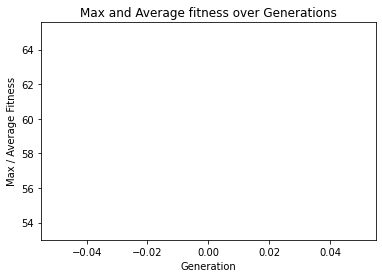

- Generation 2: Max Fitness = 66.0, Avg Fitness = 56.855
Best Individual =  1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 



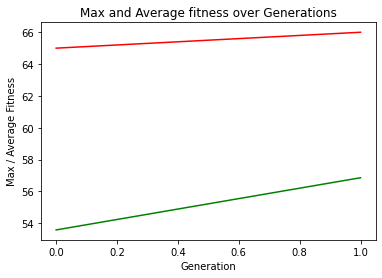

- Generation 3: Max Fitness = 69.0, Avg Fitness = 59.42
Best Individual =  1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 



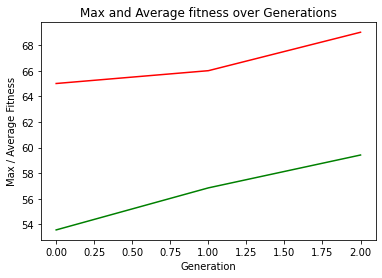

- Generation 4: Max Fitness = 70.0, Avg Fitness = 62.03
Best Individual =  1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 



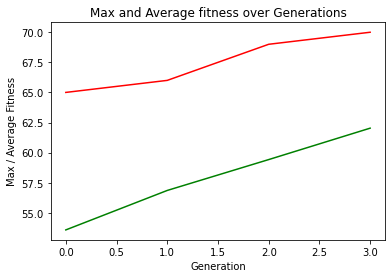

- Generation 5: Max Fitness = 75.0, Avg Fitness = 64.715
Best Individual =  1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 



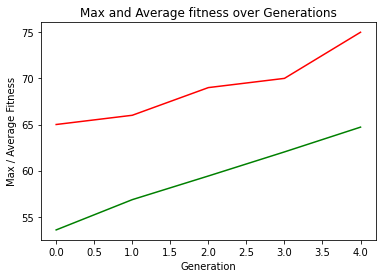

- Generation 6: Max Fitness = 75.0, Avg Fitness = 67.515
Best Individual =  1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 



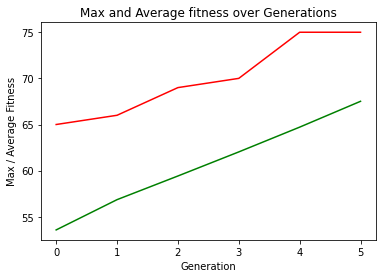

- Generation 7: Max Fitness = 77.0, Avg Fitness = 70.215
Best Individual =  1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 



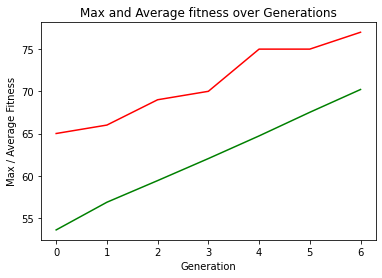

- Generation 8: Max Fitness = 81.0, Avg Fitness = 72.475
Best Individual =  1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 



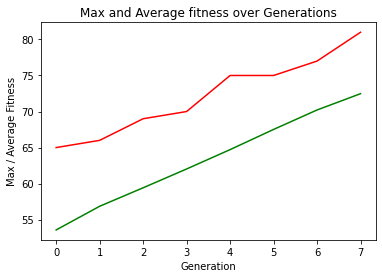

- Generation 9: Max Fitness = 82.0, Avg Fitness = 74.79
Best Individual =  1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 



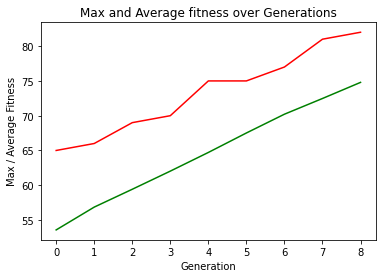

- Generation 10: Max Fitness = 85.0, Avg Fitness = 76.685
Best Individual =  1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 



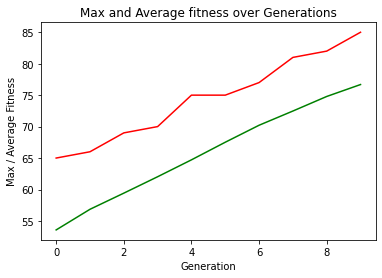

- Generation 11: Max Fitness = 85.0, Avg Fitness = 78.46
Best Individual =  1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 



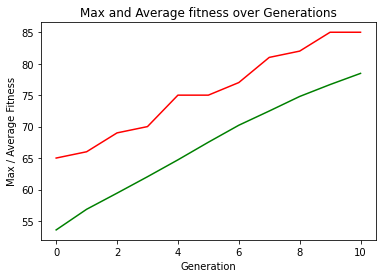

- Generation 12: Max Fitness = 87.0, Avg Fitness = 80.265
Best Individual =  1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 



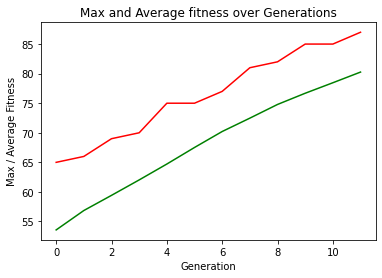

- Generation 13: Max Fitness = 87.0, Avg Fitness = 81.8
Best Individual =  1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 



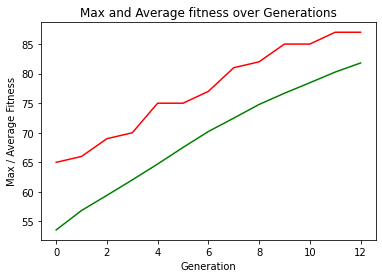

- Generation 14: Max Fitness = 87.0, Avg Fitness = 83.15
Best Individual =  1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 



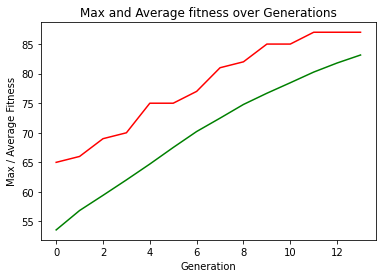

- Generation 15: Max Fitness = 89.0, Avg Fitness = 84.4
Best Individual =  1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 



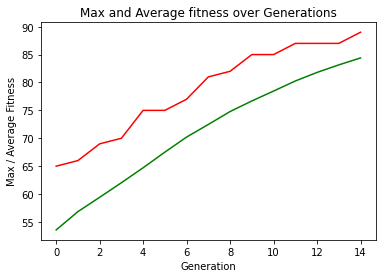

- Generation 16: Max Fitness = 89.0, Avg Fitness = 85.59
Best Individual =  1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 



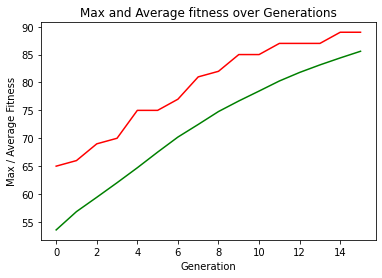

- Generation 17: Max Fitness = 90.0, Avg Fitness = 86.755
Best Individual =  1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 



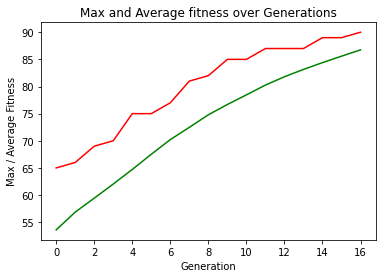

- Generation 18: Max Fitness = 91.0, Avg Fitness = 87.715
Best Individual =  1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 



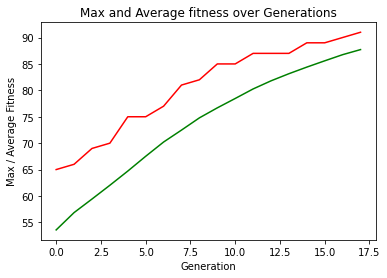

- Generation 19: Max Fitness = 92.0, Avg Fitness = 88.495
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 



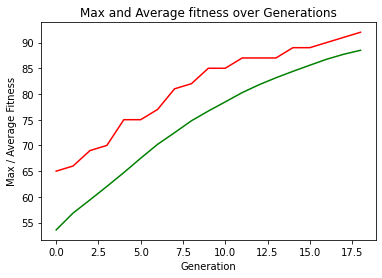

- Generation 20: Max Fitness = 92.0, Avg Fitness = 89.275
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 



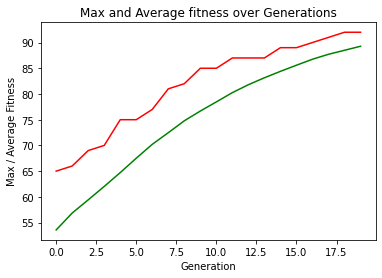

- Generation 21: Max Fitness = 93.0, Avg Fitness = 90.04
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 



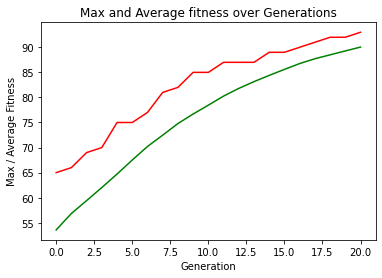

- Generation 22: Max Fitness = 94.0, Avg Fitness = 90.865
Best Individual =  1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 



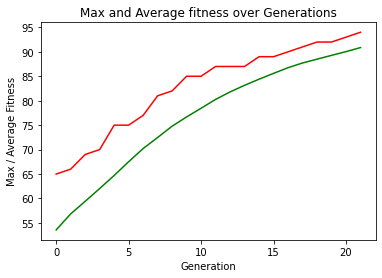

- Generation 23: Max Fitness = 94.0, Avg Fitness = 91.645
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 



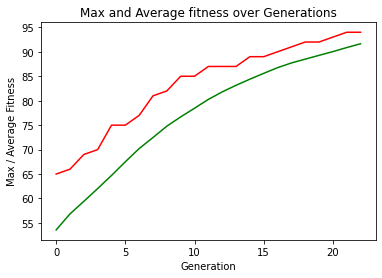

- Generation 24: Max Fitness = 95.0, Avg Fitness = 92.69
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 



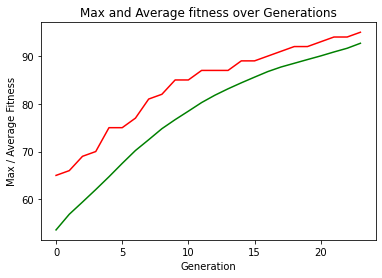

- Generation 25: Max Fitness = 95.0, Avg Fitness = 93.325
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 



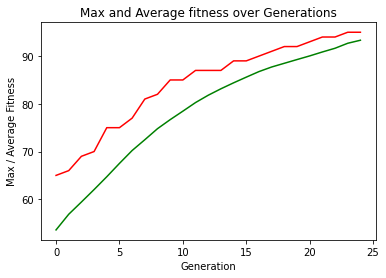

- Generation 26: Max Fitness = 95.0, Avg Fitness = 93.935
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 



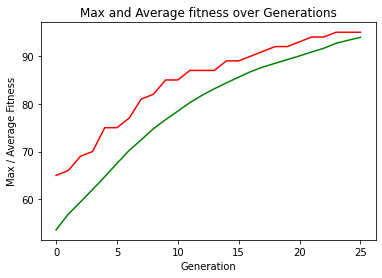

- Generation 27: Max Fitness = 96.0, Avg Fitness = 94.39
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 



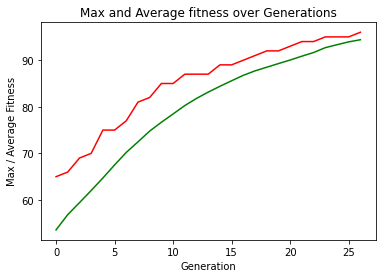

- Generation 28: Max Fitness = 96.0, Avg Fitness = 94.84
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 



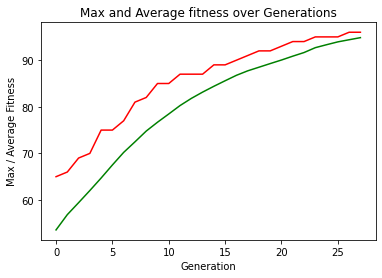

- Generation 29: Max Fitness = 96.0, Avg Fitness = 95.07
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 



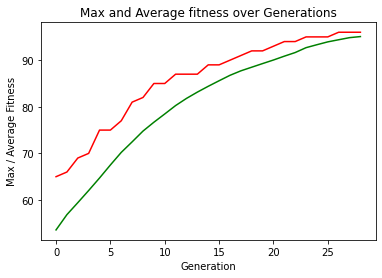

- Generation 30: Max Fitness = 97.0, Avg Fitness = 95.325
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 



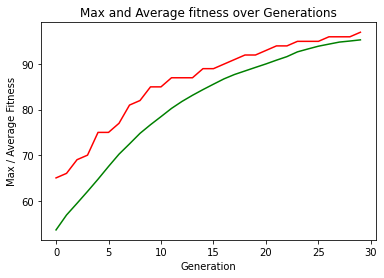

- Generation 31: Max Fitness = 97.0, Avg Fitness = 95.69
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 



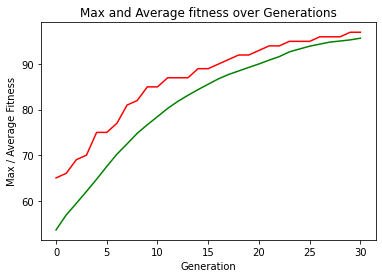

- Generation 32: Max Fitness = 97.0, Avg Fitness = 95.93
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 



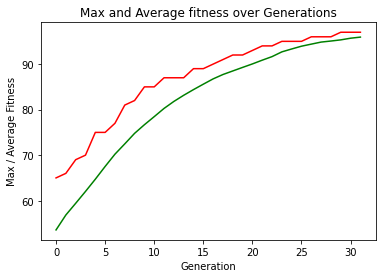

- Generation 33: Max Fitness = 97.0, Avg Fitness = 96.085
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 



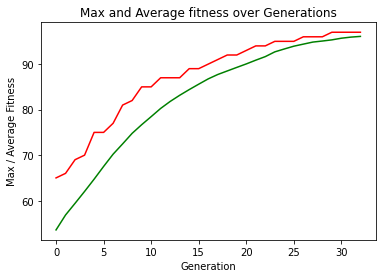

- Generation 34: Max Fitness = 98.0, Avg Fitness = 96.325
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 



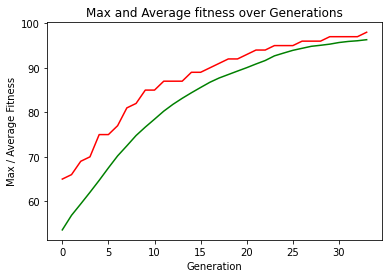

- Generation 35: Max Fitness = 98.0, Avg Fitness = 96.835
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 



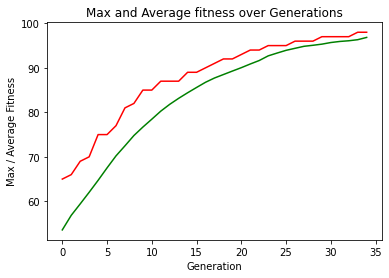

- Generation 36: Max Fitness = 98.0, Avg Fitness = 97.18
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 



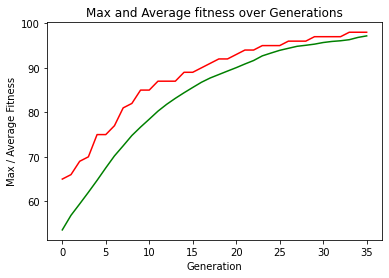

- Generation 37: Max Fitness = 99.0, Avg Fitness = 97.655
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 



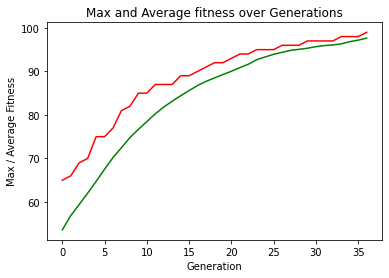

- Generation 38: Max Fitness = 99.0, Avg Fitness = 97.91
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 



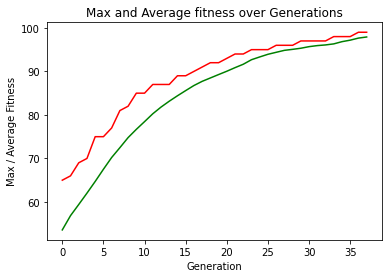

- Generation 39: Max Fitness = 99.0, Avg Fitness = 98.04
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 



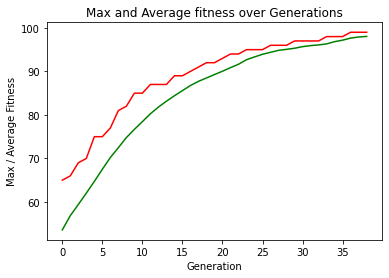

- Generation 40: Max Fitness = 100.0, Avg Fitness = 98.29
Best Individual =  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 



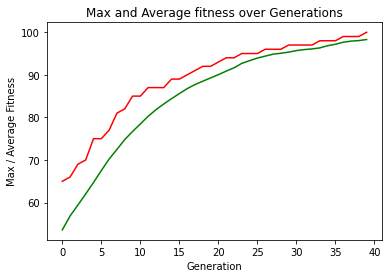

In [42]:
maxFitnessValues = []
meanFitnessValues = []


while max(fitnessValues) < ONE_MAX_LENGTH and generationCounter < MAX_GENERATIONS:
  generationCounter = generationCounter + 1

  offspring = toolbox.select(population, len(population))
  # for apply the next genetic operators without affecting the original population
  offspring = list(map(toolbox.clone, offspring))
  #2==jump step
  for child1, child2 in zip(offspring[::2], offspring[1::2]):
    if random.random() < P_CROSSOVER:
      toolbox.crossover(child1, child2)
      del child1.fitness.values
      del child2.fitness.values

  for mutant in offspring:
    if random.random() < P_MUTATION:
      toolbox.mutate(mutant)
      del mutant.fitness.values

  #re-evaluated freshIndividuals
  freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
  freshFitnessValues = list(map(toolbox.evaluate,freshIndividuals))

  for individual, fitnessValue in zip(freshIndividuals,freshFitnessValues):
    individual.fitness.values = fitnessValue                                    
                                
  population[:] = offspring

  fitnessValues = [ind.fitness.values[0] for ind in population]

  maxFitness = max(fitnessValues)
  meanFitness = sum(fitnessValues) / len(population)
  maxFitnessValues.append(maxFitness)
  meanFitnessValues.append(meanFitness)
  print("- Generation {}: Max Fitness = {}, Avg Fitness = {}".format(generationCounter,
                                                                     maxFitness, meanFitness))
  best_index = fitnessValues.index(max(fitnessValues))
  print("Best Individual = ", *population[best_index], "\n")

  plt.plot(maxFitnessValues, color='red')
  plt.plot(meanFitnessValues, color='green')
  plt.xlabel('Generation')
  plt.ylabel('Max / Average Fitness')
  plt.title('Max and Average fitness over Generations')
  plt.show()
  

<hr/><hr/><hr/><hr/><hr/>
<hr/><hr/><hr/><hr/><hr/>
<hr/><hr/><hr/><hr/><hr/> 

#<a>**Using built-in algorithms**</a>


/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	max	avg   
0  	200   	61 	49.695
1  	193   	65 	53.575
2  	179   	66 	56.855
3  	187   	69 	59.42 
4  	184   	70 	62.03 
5  	188   	75 	64.715
6  	176   	75 	67.515
7  	184   	77 	70.215
8  	180   	81 	72.475
9  	174   	82 	74.79 
10 	172   	85 	76.685
11 	177   	85 	78.46 
12 	178   	87 	80.265
13 	178   	87 	81.8  
14 	184   	87 	83.15 
15 	181   	89 	84.4  
16 	185   	89 	85.59 
17 	174   	90 	86.755
18 	186   	91 	87.715
19 	184   	92 	88.495
20 	178   	92 	89.275
21 	176   	93 	90.04 
22 	185   	94 	90.865
23 	180   	94 	91.645
24 	177   	95 	92.69 
25 	191   	95 	93.325
26 	169   	95 	93.935
27 	184   	96 	94.39 
28 	184   	96 	94.84 
29 	179   	96 	95.07 
30 	183   	97 	95.325
31 	180   	97 	95.69 
32 	189   	97 	95.93 
33 	177   	97 	96.085
34 	188   	98 	96.325
35 	169   	98 	96.835
36 	182   	98 	97.18 
37 	183   	99 	97.655
38 	182   	99 	97.91 
39 	192   	99 	98.04 
40 	173   	100	98.29 
41 	182   	100	98.55 
42 	176   	100	98.915
43 	188   	100	99.195
44 	192   

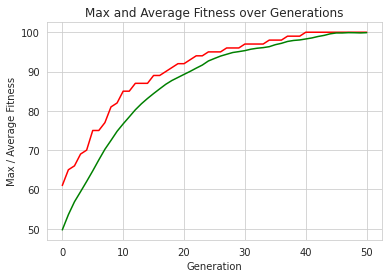

In [ ]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

# problem constants:
ONE_MAX_LENGTH = 100  # length of bit string to be optimized

# Genetic Algorithm constants:
POPULATION_SIZE = 200
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 50


# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, 
                 toolbox.zeroOrOne, ONE_MAX_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation:
# compute the number of '1's in the individual
def oneMaxFitness(individual):
    return sum(individual),  # return a tuple


toolbox.register("evaluate", oneMaxFitness)

# genetic operators:mutFlipBit

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

#####################################################################################
#####################################################################################

# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", numpy.max)
    stats.register("avg", numpy.mean)
    # perform the Genetic Algorithm flow:
    population, logbook = algorithms.eaSimple(  population, toolbox, 
                                                cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                                ngen=MAX_GENERATIONS,
                                                stats=stats, verbose=True )
    # Genetic Algorithm is done - extract statistics:
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average Fitness over Generations')
    plt.show()


if __name__ == "__main__":
    main()

In [ ]:
from deap.tools import Logbook
log = Logbook()
log.record(gen=0, mean=5.4, max=10.0)
log.record(gen=1, mean=9.4, max=15.0)


print('mean : ' ,log.select("mean"))
gen_num , max = log.select("gen", "max")
print(f'gen : {gen_num} \t max : {max}')

mean :  [5.4, 9.4]
gen : [0, 1] 	 max : [10.0, 15.0]


In [ ]:
#deap.algorithms.varAnd
#select-> crossover and mutation 

##################

#deap.algorithms.varOr
#select -> [ crossover or mutation or reproduction ] 

In [ ]:
#deap.algorithms.eaSimple

#evaluate(population)
#for g in range(ngen):
#    population = select(population, len(population))
#    offspring = varAnd(population, toolbox, cxpb, mutpb)
#    evaluate(offspring)
#    population = offspring

In [ ]:
#deap.algorithms.eaMuPlusLambda
#evaluate(population)
#for g in range(ngen):
#    offspring = varOr(population, toolbox, lambda_, cxpb, mutpb)
#    evaluate(offspring)
#    population = select(population + offspring, mu)